<a href="https://colab.research.google.com/github/shinsano/hello-world/blob/master/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 教師なし学習の目的
* データの本質的な構造を理解するためにおこなう．
* 教師あり学習の前段階としてラベル付を行うために行うこともある．
### 次元削減
* 複雑な，高次元データをどう扱うか？
  * 可視化できない、直感的にデータの構造が理解できない（次元の呪い）
  * 多くの場合、変数間に相関があったり、分析する上で重要な意味を持つ変数は少なかったりする
  * 情報のエッセンスを失わずに変数を減らすことができるはずである．
* 手法：主成分分析、特異値分解、非負行列分解、多次元尺度法
### 主成分分析
* 特徴量抽出、次元削減に使う
 * 分散最大化
 * 誤差最小化
 

###分散最大化 (Maximizing the component vector variances) の定式化
#####２次元データを１次元軸上へ射影する場合

$n$個の２次元データ集合、$\Large{\{X_n\}}$を考える (ベクトル$\{X_１\}$，ベクトル$\{X_2\}$，ベクトル$\{X_3\}$,....ベクトル$\{X_n\})$
<br><br>例）$n$人の人の{身長、体重}のようなデータ．
<br><br>


これら$n$個の２次元データを，データの中心（平均、原点）を通る主成分軸（feature axis/PC axis）　$y=w_1x_1 + w_2x_2$　上へ射影したデータを<br>

${y_i=w_1x_1 + w_2x_2 = w^Tx_i,  i=1,2,...,n}$ とする．
<br><br>

目的は，この$\Large{y}$の分散を最大にするような$\Large{W}$求めること．

なので、$\Large{y}$の分散を考えるために，まずは$\Large{y}$の平均$\Large\bar{y}$を考える．

分散は，元のデータ（個々のデータ）から平均を引いて２乗したものを全部足して個数で割る

\begin{equation}
\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i=\sum_{i=1}^{n}(w_1x_1 + w_2x_2) = w_1\bar{x}_1+w_2\bar{x}_2=w^T\bar{x}
\end{equation}

$\Large\bar{X}$はサンプル集合の平均で　$\bar{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$　で求められる．

よって、射影された$\Large{y}$ の分散は

\begin{equation}
S_y^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2
\end{equation}

\begin{align*}
S_y^2&=\frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2\\
&=\frac{1}{n}\sum_{i=1}^{n}\{w_1(x_{i1}-\bar{x}_1)+w_2(x_{i2}-\bar{x}_2)\}^2\\
&=w_1^2\frac{1}{n}\sum_{i=1}^{n}(x_{i1}-\bar{x}_1)^2+2w_1w_2\frac{1}{n}\sum_{i=1}^{n}(x_{i1}-\bar{x}_1)(x_{i2}-\bar{x}_2)+w_2^2\frac{1}{n}\sum_{i=1}^{n}(x_{i2}-\bar{x}_2)^2\\
&=w_1^2s_{11}+2w_1w_2s_{12}+w_2^2s_{22}\\
&=w^TS_w
\end{align*}
<br><br>
ここで$\Large{S}$は分散共分散行列であり，次のように定義される．
<br><br>

$S＝
\begin{pmatrix}
S_{11} & S_{12} \\
S_{21} & S_{22} \\
\end{pmatrix}
$
<br><br>

$S_{11}$ はデータ１の分散<br>
$S_{12}$ はデータ１とデータ２の共分散<br>
$S_{21}$ はデータ２とデータ１の共分散<br>
$S_{22}$ はデータ２の分散<br>

つまり、$\large{y}$の分散は$X_1$ と $X_2$の共分散によって表される

よって，分散が最大になるように係数ベクトル$\Large{W}$を求める問題は，$\Large{w^TSw}$を最大化する問題に帰着される．
 



* ただし，この最大化問題は制約がなく，$||W||=\infty$という不適切な解が出てしまうため，$w^T=1$という制約を与え，制約付き最大化問題とする．


* いま求めるべきは，主成分軸を表す係数ベクトルの長さではなく，向きであるため，この制約は妥当である．

* この制約付き最大化問題をラグランジュの未定乗数法などを使って解き$\large{W}$を求める．

* こうして得られた分散を最大化する射影軸を第１主成分、それと直行するという条件を満たした上で分散が最大化するものを第２主成分と呼ぶ．


###情報損失とは

* ２次元データ(20, 10)と(10, 20)は射影後には同じ点になってしまう．射影によって違いを表す情報が失われてしまうことを情報損失という．

* i番目の主成分にどれだけ情報を残せているのかを測る基準が「寄与率」

\begin{equation}
\frac{\lambda_i}{\lambda_1+\lambda_2+...+\lambda_p}
\end{equation}

* 第１主成分から第k主成分までの累積の情報量示すのが「累積寄与率」
* 主成分分析では，通常この累積寄与率を高く保てるように次元削減を行う．

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
!setup.py install

/bin/bash: setup.py: command not found


In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3df5015df9293b61995f1834963e2d7ac876ef9ffad6a3ee2149aeae55a5695f
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import urllib.request 

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/My Drive/python_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

df.info() #欠損値を埋める

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
x = df.drop(columns=['PassengerId','Survived', 'Name', 'Ticket','Cabin'])#x と yに分割　使わないデータをリスト
y = df['Survived']#予測の対象となるデータ

In [11]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex', 'Embarked']

for col in cat_features:
  lbl = LabelEncoder()
  x[col] = lbl.fit_transform(list(df[col].values))

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [13]:
from sklearn.preprocessing import StandardScaler #標準化

num_features = ['Age', 'Fare']

for col in num_features:
  scaler = StandardScaler()
  x[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,2
1,1,0,0.638789,1,0,0.786845,0
2,3,0,-0.284663,0,0,-0.488854,2
3,1,0,0.407926,1,0,0.420730,2
4,3,1,0.407926,0,0,-0.486337,2


In [14]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Fare']

for col in num_features:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))
    
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.592481,1,0,-0.502445,2
1,1,0,0.638789,1,0,0.786845,0
2,3,0,-0.284663,0,0,-0.488854,2
3,1,0,0.407926,1,0,0.420730,2
4,3,1,0.407926,0,0,-0.486337,2


In [15]:
from sklearn.decomposition import PCA

pca = PCA()

x_pca = pca.fit_transform(x)
x_pca

array([[ 0.45240718, -1.08298647,  0.12184369, ..., -0.55341304,
         0.2574928 ,  0.15903496],
       [-0.08520984,  1.87617495, -0.30677503, ..., -0.31736987,
        -0.66307032, -0.44422571],
       [-0.36969259, -0.95386643, -0.1575431 , ...,  0.01692   ,
         0.18455959, -0.80472577],
       ...,
       [ 1.13142423, -0.3480859 ,  0.54543858, ...,  1.39577684,
         0.09312179, -0.42051188],
       [-0.67546747,  0.80709975, -1.12539145, ..., -0.23315296,
        -1.02397979,  0.62311463],
       [-0.69590791, -0.65273176, -0.16961654, ...,  0.13211487,
         0.38827362,  0.20329391]])

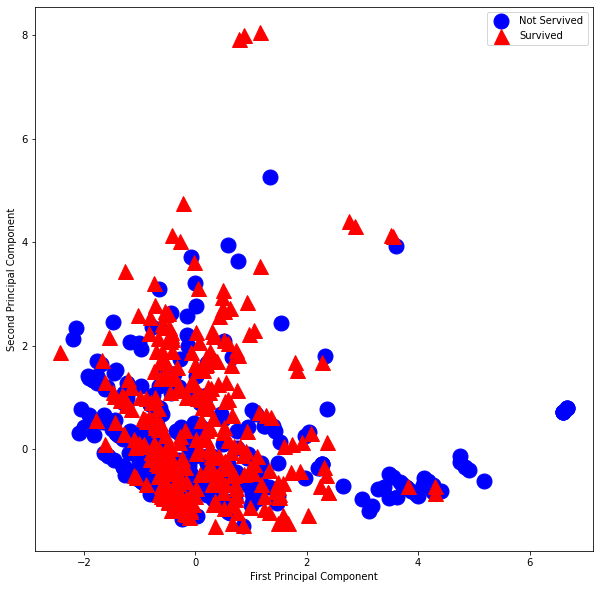

In [16]:
def plot_2d(x, y):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", ms=15)
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "r^", ms=15)
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.legend(['Not Servived','Survived'], loc ="best")

plt.figure(figsize=(10, 10))
plot_2d(x_pca, y)
plt.show()

次元を減らしたものの、分類になっていない

In [17]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y):
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')

  ax.plot(x[:, 0][y==0], x[:, 1][y==0], x[:, 2][y==0], "bo", ms=15)
  ax.plot(x[:, 0][y==1], x[:, 1][y==1], x[:, 2][y==1], "r^", ms=15)

  ax.set_xlabel("First Principal Component", fontsize=15)
  ax.set_ylabel("Second Principal Component", fontsize=15)
  ax.set_zlabel("Third Principal Component", fontsize=15)
  ax.legend(['Not Survived', 'Survived'], loc="best", fontsize=16)

plot_3d(x_pca, y)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

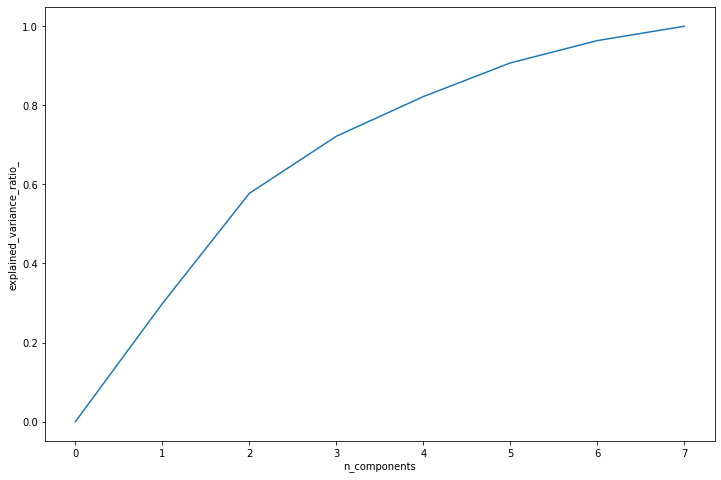

In [18]:
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(np.hstack([0, pca.explained_variance_ratio_.cumsum()]))
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

累積寄与率を表示したい


In [19]:
pca.components_


array([[ 0.11183674, -0.07941325, -0.44243158,  0.76780369,  0.40112225,
         0.18238728,  0.04187721],
       [-0.54871564, -0.07710008,  0.36282116,  0.06927113,  0.10611681,
         0.70697471, -0.21320182],
       [ 0.03346417,  0.07149479,  0.73973136,  0.43191677,  0.07253554,
        -0.27057867,  0.42607492],
       [ 0.19277072,  0.01344342,  0.23438192,  0.31042877, -0.19503473,
        -0.22658432, -0.84969337],
       [ 0.20976867, -0.16834458,  0.19546601, -0.34328849,  0.85013236,
        -0.10800491, -0.19290713],
       [ 0.75997778,  0.20089286,  0.16678221, -0.06882831, -0.1246611 ,
         0.57338804,  0.07216615],
       [-0.16295448,  0.95590744, -0.06674175, -0.01328797,  0.21511576,
        -0.04392559, -0.08277387]])

順番に第１から第７主成分の入れるデータ
0.76780369 （第１主成分の四番目のデータ）が最も影響している

AttributeError: ignored

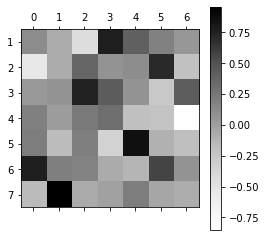

In [20]:
plt.matshow(pca.components_, cmap='Greys')
plt.yticks(range(len(pca.components_)), range(1, len(pca.components_) + 1))
plt.colorbar()
plt.xticks(range(x.shape[1]), x.columns.value, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PrincipalComponents')
plt.show()


In [21]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from sklearn.preprocessing import StandardScaler #標準化

num_features = ['S1','S2','S3','S4','S5']

for col in num_features:
  scaler = StandardScaler()
  x[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))

x.head()

,id,Participant Name,S1,S2,S3,S4,S5,Interacted w/ pop-ups
0,1,Abby,-1.216094,-0.820095,0.692388,0.784936,0.562731,-
1,2,Allison,1.908181,-0.820095,0.692388,-1.152875,-1.777047,no
2,3,Ashleigh,1.908181,-0.820095,-0.162278,0.784936,-0.607158,yes
3,4,Brianna,-0.435026,-0.820095,0.692388,-1.152875,-0.607158,-
4,5,C,-1.216094,-0.820095,0.692388,0.784936,0.562731,-


In [31]:
from sklearn.decomposition import PCA

pca = PCA()

x_pca = pca.fit_transform(x)
x_pca

ValueError: ignored